In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# multivariate data preparation & prediction using MLP
from numpy import array
from numpy import hstack
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ReduceLROnPlateau

In [ ]:
#definining function from machinelearningmastery.com. Used to segment total cases (y) and other variables in n_steps
# def split_sequences(sequences, n_steps):
#     X, y = list(), list()
#     for i in range(len(sequences)):

#         end_ix = i + n_steps

#         if end_ix > len(sequences):
#             break

#         seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# test train splitter


def train_test_split(data, n_test):

    return data[:-n_test], data[-n_test:]

In [ ]:
# the dataset is modelled here such that it is compatible with out MLP model

bd = pd.read_csv('/content/drive/MyDrive/New data/csv files/bd_owid_filtered.csv', sep = ';')
bd.tail()

dates = bd[['date']]
bddata = bd.drop(columns = "date")

bddata = bd[["total_cases"]]




In [ ]:
bddata.tail()

,total_cases
473,848027.0
474,851668.0
475,856304.0
476,861150.0
477,866877.0


In [ ]:
# totalcases = bddata[['total_cases']]
# totalcases.describe()

In [ ]:
# bddata = bddata.drop(columns = "total_cases")

In [ ]:
# frames = [bddata, totalcases]

# data = pd.concat(frames, axis = 1)

# data.head()



In [ ]:
datanum = bddata.to_numpy()

In [ ]:
n_test = 9
datanum, testset = train_test_split(datanum, n_test)

In [ ]:
datanum.shape

(469, 1)

In [ ]:
n_steps = 3
X, y = split_sequence(datanum, n_steps)

In [ ]:
X.shape
for i in range(len(X)):
	print(X[i], y[i])

In [ ]:
X.shape, y.shape

((466, 3, 1), (466, 1))

In [ ]:
# flatten input

n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))
X.shape

In [ ]:
# define
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 500)               2000      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 501       
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, min_lr=0.001)

In [ ]:
model.fit(X, y, epochs=2500, verbose=0)

In [ ]:
Xdata, yactual = split_sequence(datanum, n_steps)
y_pred = model.predict(X);

In [ ]:
Xdatatest, yactualtest = split_sequence(testset, n_steps)
# Xdatatest = Xdatatest.reshape((1, n_steps))
# y_pred_test = model.predict(X);
Xdatatest.shape, X.shape
Xdatatest = Xdatatest.reshape((Xdatatest.shape[0], n_input))
y_pred_test = model.predict(Xdatatest);

In [ ]:
y_pred.shape

(466, 1)

In [ ]:
yactual.shape

(466, 1)

In [ ]:
y_pred_test.shape

(6, 1)

In [ ]:
yactualtest.shape

(6, 1)

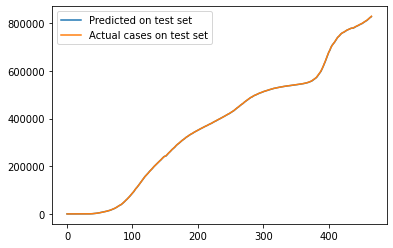

In [ ]:
import matplotlib.pyplot as plt

dates = dates.astype('datetime64')
dates = dates.to_numpy()


plt.plot(y_pred,label="Predicted on test set")

plt.plot(yactual,label="Actual cases on test set")
plt.legend()

In [ ]:
dates.shape
dates_plot = dates[n_steps-1:-n_test-1]

In [ ]:
dates_plot.shape

(466, 1)

Text(0.5, 0, 'Date')

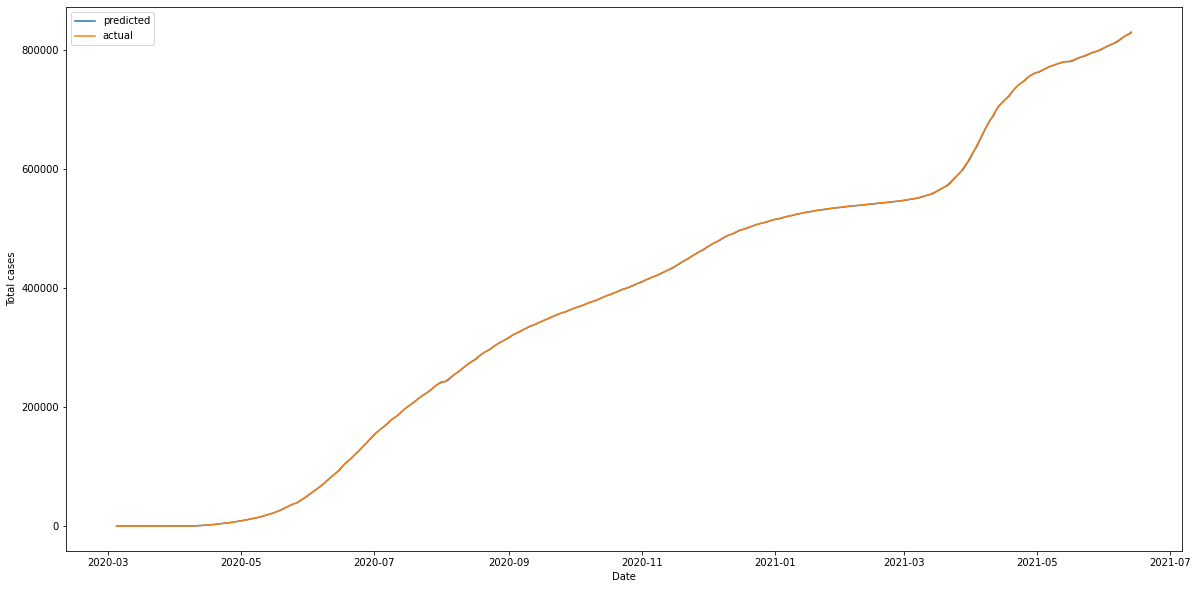

In [ ]:
fig , axis = plt.subplots(1,1)
fig.set_size_inches(20,10)

plt.plot( dates_plot, y_pred, label = 'predicted')
plt.plot(dates_plot, yactual, label = 'actual')
plt.legend()

plt.ylabel('Total cases')
plt.xlabel('Date')

In [ ]:
dates_plot_test = dates[-n_test+3:]

dates_plot_test.shape

(6, 1)

In [ ]:
y_pred_test

array([[844295.2 ],
       [848136.4 ],
       [850865.94],
       [854338.1 ],
       [859681.75],
       [865110.6 ]], dtype=float32)

In [ ]:
yactualtest

array([[844970.],
       [848027.],
       [851668.],
       [856304.],
       [861150.],
       [866877.]])

In [ ]:
dates_plot_test

array([['2021-06-18T00:00:00.000000000'],
       ['2021-06-19T00:00:00.000000000'],
       ['2021-06-20T00:00:00.000000000'],
       ['2021-06-21T00:00:00.000000000'],
       ['2021-06-22T00:00:00.000000000'],
       ['2021-06-23T00:00:00.000000000']], dtype='datetime64[ns]')

Text(0.5, 0, 'Date')

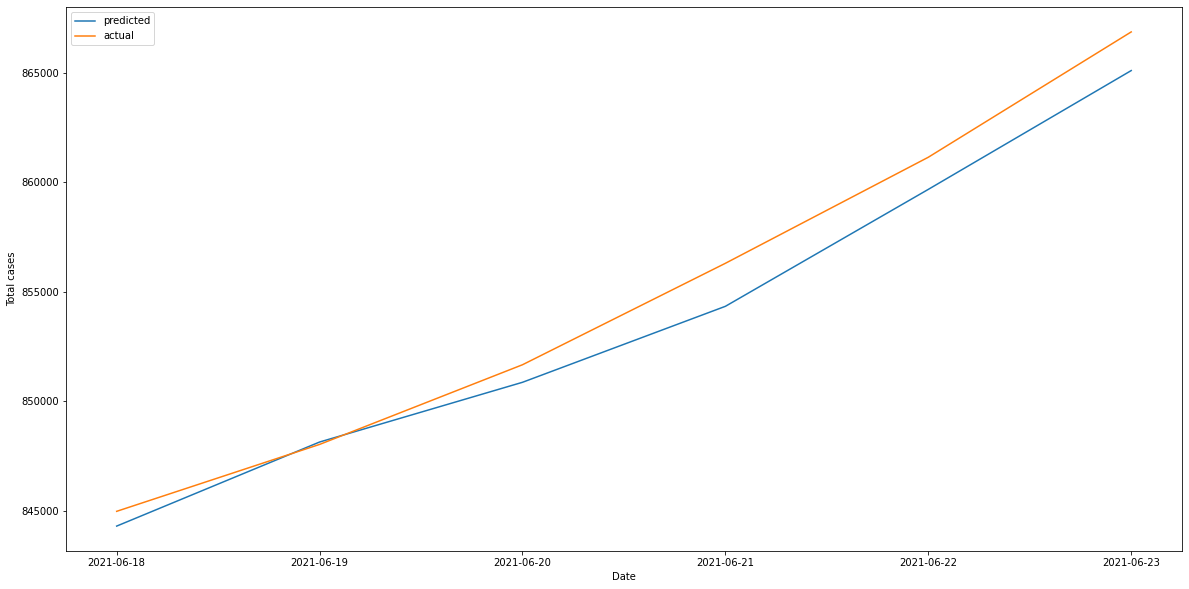

In [ ]:
fig , axis = plt.subplots(1,1)
fig.set_size_inches(20,10)



plt.plot( dates_plot_test, y_pred_test, label = 'predicted')
plt.plot(dates_plot_test, yactualtest, label = 'actual')
plt.legend()

plt.ylabel('Total cases')
plt.xlabel('Date')

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mlp_mape = mean_absolute_percentage_error(yactualtest, y_pred_test)
mlp_mape

0.13179565640102806

In [ ]:
#accuracy measurement
test_accuracy = 100 - mlp_mape
test_accuracy

99.86820434359898